In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv("P:\\DATA SCIENCE\\Udemy Courses\\OwnDataScience_Practice\\Begineer\\LoanPredictionDataSet\\train.csv")
test=pd.read_csv("P:\\DATA SCIENCE\\Udemy Courses\\OwnDataScience_Practice\\Begineer\\LoanPredictionDataSet\\test.csv")
y_train=train.iloc[:,12]
train=pd.concat([train.iloc[:,0:12],test])
train=train.iloc[:,0:12]
train.head()
LoanId=train.iloc[:,0]

In [3]:
LoanId.shape

(981,)

In [4]:
print(train.count())
print(type(train['Dependents']))
train.describe()

Loan_ID              981
Gender               957
Married              978
Dependents           956
Education            981
Self_Employed        926
ApplicantIncome      981
CoapplicantIncome    981
LoanAmount           954
Loan_Amount_Term     961
Credit_History       902
Property_Area        981
dtype: int64
<class 'pandas.core.series.Series'>


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [5]:
print("RATIO OF MALE VS FEMALE")
print(train.groupby(['Married']).Gender.count()['Yes'])
print(":")
print(train.groupby(['Married']).Gender.count()['No'])
print(train.groupby(['Married','Education']).Education.count())
train['Married'].fillna('Yes',inplace=True)
train.count()

RATIO OF MALE VS FEMALE
618
:
336
Married  Education   
No       Graduate        275
         Not Graduate     72
Yes      Graduate        485
         Not Graduate    146
Name: Education, dtype: int64


Loan_ID              981
Gender               957
Married              981
Dependents           956
Education            981
Self_Employed        926
ApplicantIncome      981
CoapplicantIncome    981
LoanAmount           954
Loan_Amount_Term     961
Credit_History       902
Property_Area        981
dtype: int64

In [6]:
y_train.head()
train['Gender'].fillna('Male',inplace=True)
train.count()

Loan_ID              981
Gender               981
Married              981
Dependents           956
Education            981
Self_Employed        926
ApplicantIncome      981
CoapplicantIncome    981
LoanAmount           954
Loan_Amount_Term     961
Credit_History       902
Property_Area        981
dtype: int64

In [7]:
train['Self_Employed'].fillna('No',inplace=True)
train.count()

Loan_ID              981
Gender               981
Married              981
Dependents           956
Education            981
Self_Employed        981
ApplicantIncome      981
CoapplicantIncome    981
LoanAmount           954
Loan_Amount_Term     961
Credit_History       902
Property_Area        981
dtype: int64

In [8]:
train['Credit_History'].fillna(1.0,inplace=True)
train.count()

Loan_ID              981
Gender               981
Married              981
Dependents           956
Education            981
Self_Employed        981
ApplicantIncome      981
CoapplicantIncome    981
LoanAmount           954
Loan_Amount_Term     961
Credit_History       981
Property_Area        981
dtype: int64

In [9]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)
train.count()

Loan_ID              981
Gender               981
Married              981
Dependents           956
Education            981
Self_Employed        981
ApplicantIncome      981
CoapplicantIncome    981
LoanAmount           981
Loan_Amount_Term     961
Credit_History       981
Property_Area        981
dtype: int64

In [10]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median(),inplace=True)
train.count()

Loan_ID              981
Gender               981
Married              981
Dependents           956
Education            981
Self_Employed        981
ApplicantIncome      981
CoapplicantIncome    981
LoanAmount           981
Loan_Amount_Term     981
Credit_History       981
Property_Area        981
dtype: int64

In [11]:
train['Dependents'].fillna('0',inplace=True)
train.count()

Loan_ID              981
Gender               981
Married              981
Dependents           981
Education            981
Self_Employed        981
ApplicantIncome      981
CoapplicantIncome    981
LoanAmount           981
Loan_Amount_Term     981
Credit_History       981
Property_Area        981
dtype: int64

In [ ]:
train.groupby(['Gender','Education','Credit_History']).Gender.count()

In [ ]:
#genderNull=train.groupby(['Gender','Married','Dependents']).Gender.count()
genderNull=train.groupby(['Gender','Married']).Gender.count()
genderNull

In [ ]:
train.groupby(['Gender','Married','CoapplicantIncome']).Gender.count()['Female']['Yes']

In [ ]:
#Finding the Gender Ratio on the basis of Married and Dependents
gender=['Male','Female']
bool_=['Yes','No']
dependents=['0','1','2','3+']
string=''
Male=[]
Female=[]
graphVal=[]

for i in range(len(gender)):
    for j in range(len(bool_)):
        #for k in range(len(dependents)):
            try :
                string=string+"Gender "+gender[i]+" is "
                #print()
                if bool_[j]=='Yes':
                    string=string+"Married "
                if bool_[j]!='Yes':
                    string=string+" Not Married "
                
               # print(genderNull[gender[i]][bool_[j]][dependents[k]])
               # print(train.groupby(['Gender','Married']).Gender.count()[gender[i]][bool_[j]])
                ratio=(genderNull[gender[i]][bool_[j]]/train.groupby(['Gender']).Gender.count()[gender[i]])*100; #Without Dependents
               # ratio=(genderNull[gender[i]][bool_[j]][dependents[k]]/train.groupby(['Gender','Married']).Gender.count()[gender[i]][bool_[j]])*100; #With Dependents
                graphVal.append(ratio)
                #string=string+" "+dependents[k]+" "+str(ratio);
                string=string+" "+str(ratio);
                print(string)
                string='';
            except Exception as e: 
                print(e)     
                print("ERROR ")

                


In [12]:
train=train.dropna(axis=0,how='any')
train.shape

(981, 12)

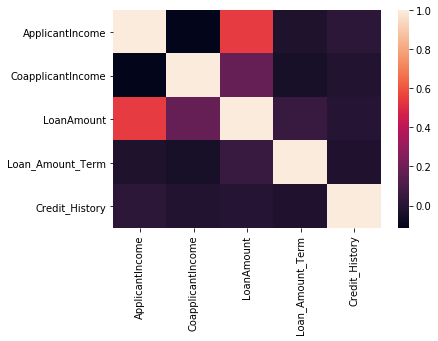

In [13]:
sns.heatmap(train.corr())

In [14]:
train=train.drop(columns=['Loan_ID'])
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [15]:
train.shape

(981, 11)

In [16]:
X_train=train.iloc[:,0:11]
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [17]:
#y_train=train.iloc[:,11]
y_train.shape

(614,)

In [18]:
genderDummy=pd.get_dummies(X_train['Gender'])
graduateDummy=pd.get_dummies(X_train['Education'],prefix='Education')
marriedDummy=pd.get_dummies(X_train['Married'],prefix='Married')
self_emp_dummy=pd.get_dummies(X_train['Self_Employed'],prefix='Self_Employed')
dependentDummy=pd.get_dummies(X_train['Dependents'],prefix='Dependent')
propertyDummy=pd.get_dummies(X_train['Property_Area'],prefix='Property')
creditDummy=pd.get_dummies(X_train['Credit_History'],prefix='Credit')
X_train.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [19]:
dummies=[genderDummy,graduateDummy,marriedDummy,self_emp_dummy,dependentDummy,propertyDummy,creditDummy]
for i in range(len(dummies)):
    print(dummies[i].head())

   Female  Male
0       0     1
1       0     1
2       0     1
3       0     1
4       0     1
   Education_Graduate  Education_Not Graduate
0                   1                       0
1                   1                       0
2                   1                       0
3                   0                       1
4                   1                       0
   Married_No  Married_Yes
0           1            0
1           0            1
2           0            1
3           0            1
4           1            0
   Self_Employed_No  Self_Employed_Yes
0                 1                  0
1                 1                  0
2                 0                  1
3                 1                  0
4                 1                  0
   Dependent_0  Dependent_1  Dependent_2  Dependent_3+
0            1            0            0             0
1            0            1            0             0
2            1            0            0             0
3           

In [20]:
X_train=X_train.drop(columns=['Gender','Education','Married','Self_Employed','Dependents','Property_Area','Credit_History'])
X_train.shape

(981, 4)

In [21]:
X_train=pd.concat([X_train,genderDummy,graduateDummy,marriedDummy,self_emp_dummy,dependentDummy,propertyDummy,creditDummy],axis=1)
X_train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Female,Male,Education_Graduate,Education_Not Graduate,Married_No,Married_Yes,...,Self_Employed_Yes,Dependent_0,Dependent_1,Dependent_2,Dependent_3+,Property_Rural,Property_Semiurban,Property_Urban,Credit_0.0,Credit_1.0
0,5849,0.0,126.0,360.0,0,1,1,0,1,0,...,0,1,0,0,0,0,0,1,0,1
1,4583,1508.0,128.0,360.0,0,1,1,0,0,1,...,0,0,1,0,0,1,0,0,0,1
2,3000,0.0,66.0,360.0,0,1,1,0,0,1,...,1,1,0,0,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,0,1,0,1,0,1,...,0,1,0,0,0,0,0,1,0,1
4,6000,0.0,141.0,360.0,0,1,1,0,1,0,...,0,1,0,0,0,0,0,1,0,1


In [22]:
X_train.shape
actualTrain=X_train

In [23]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
y_train=label.fit_transform(y_train)
y_train.shape

(614,)

In [24]:
#y_train=pd.DataFrame(y_train)
y_train

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [25]:
X_train=actualTrain.iloc[0:614,:]
testing=actualTrain.iloc[614:,:]
LoanId=LoanId[614:]
#X_train=actualTrain
X_train.shape

(614, 21)

In [26]:
LoanId.shape

(367,)

In [27]:
LoanId

0      LP001015
1      LP001022
2      LP001031
3      LP001035
4      LP001051
5      LP001054
6      LP001055
7      LP001056
8      LP001059
9      LP001067
10     LP001078
11     LP001082
12     LP001083
13     LP001094
14     LP001096
15     LP001099
16     LP001105
17     LP001107
18     LP001108
19     LP001115
20     LP001121
21     LP001124
22     LP001128
23     LP001135
24     LP001149
25     LP001153
26     LP001163
27     LP001169
28     LP001174
29     LP001176
         ...   
337    LP002856
338    LP002857
339    LP002858
340    LP002860
341    LP002867
342    LP002869
343    LP002870
344    LP002876
345    LP002878
346    LP002879
347    LP002885
348    LP002890
349    LP002891
350    LP002899
351    LP002901
352    LP002907
353    LP002920
354    LP002921
355    LP002932
356    LP002935
357    LP002952
358    LP002954
359    LP002962
360    LP002965
361    LP002969
362    LP002971
363    LP002975
364    LP002980
365    LP002986
366    LP002989
Name: Loan_ID, Length: 3

In [28]:
from sklearn.model_selection import train_test_split
xx_train,xx_test,yy_train,yy_test=train_test_split(X_train,y_train,test_size=0.1,random_state=0)

In [29]:
yy_train.shape

(552,)

In [30]:
from sklearn.linear_model import LogisticRegression
regressor=LogisticRegression()
regressor.fit(xx_train,yy_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
y_pred=regressor.predict(xx_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [32]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(yy_test,y_pred)
cm

array([[ 8,  7],
       [ 1, 46]], dtype=int64)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(yy_test,y_pred)

0.8709677419354839

In [34]:
testing.shape

(367, 21)

In [46]:
test_pred=regressor.predict(testing)
test_pred=test_pred.tolist()
test_pred

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,


In [47]:
for i in range(len(test_pred)):
    if test_pred[i]==1:
        test_pred[i]='Y'
    if test_pred[i]==0:
        test_pred[i]='N'
#print(test_pred.shape)

test_pred=pd.DataFrame(test_pred)
test_pred

,0
0,Y
1,Y
2,Y
3,Y
4,Y
5,Y
6,Y
7,N
8,Y
9,Y


In [48]:

test_pred=pd.concat([pd.DataFrame(LoanId),test_pred],axis=1)
test_pred.head()

,Loan_ID,0
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [49]:
test_pred.to_csv("P:\\DATA SCIENCE\\Udemy Courses\\OwnDataScience_Practice\\Begineer\\LoanPredictionDataSet\\Output.csv")